In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [40]:
species = pd.read_csv('species_info.csv')
print(species.head())

observations = pd.read_csv('observations.csv')
print(observations.head())

# Ejecutamos por pantalla ambos dataset.

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

In [93]:
print(species.describe) # Mostramos la información contenida en el dataframe
print(observations.describe)

<bound method NDFrame.describe of             category                scientific_name  \
0             Mammal  Clethrionomys gapperi gapperi   
1             Mammal                      Bos bison   
2             Mammal                     Bos taurus   
3             Mammal                     Ovis aries   
4             Mammal                 Cervus elaphus   
...              ...                            ...   
5819  Vascular Plant               Solanum parishii   
5820  Vascular Plant                  Solanum xanti   
5821  Vascular Plant         Parthenocissus vitacea   
5822  Vascular Plant              Vitis californica   
5823  Vascular Plant            Tribulus terrestris   

                                           common_names conservation_status  \
0                              Gapper's Red-Backed Vole     No Intervention   
1                                 American Bison, Bison     No Intervention   
2     Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Inter

In [32]:
print(f"observations shape: {observations.shape}")
print(f"species shape: {species.shape}")

# Así mostramos el tamaño de ambos datasets.

observations shape: (23296, 3)
species shape: (5824, 4)


In [34]:
print(f"number of species: {species.scientific_name.nunique()}")

# Cantidad de diferentes tipos de especie.

number of species: 5541


In [37]:
print(f"number of categories: {species.category.nunique()}")
print(f"categories : {species.category.unique()}")

# Número de categorías
# Cuáles son las categorías que hay.

number of categories: 7
categories : ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [42]:
print(species.columns)
# Las columnas que hay en el DataFrame species.

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [44]:
print(observations.columns)
# Las columnas que hay en el DataFrame observations

Index(['scientific_name', 'park_name', 'observations'], dtype='object')


In [52]:
catg_size = species.groupby('category').size()
print(catg_size)

# Agrupamos por categoría y mostramos el tamaño de cada tipo de categoría (Cantidad de animales que contiene cada una)

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


In [55]:
category_max = np.max(catg_size)
print(category_max) # -> Vascular Plant

# Cuál es la categoría con mayor número de animales.

4470


In [58]:
print(f"number of conservation statuses: {species.conservation_status.nunique()}")
print(f"unique conservation statuses: {species.conservation_status.unique()}")

# Tipos de estado de conservación 
# Cuáles son los tipos de conservación que hay.

number of conservation statuses: 4
unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [62]:
print(f"na values: {species.conservation_status.isna().sum()}")
print(species.groupby('conservation_status').size())

# Valores nan existentes en la columna de estado de conservación.
# Mostrar el tamaño de los tipos de estado de conservación que hay (cantidad de animales que contiene cada uno)

na values: 5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [65]:
species.fillna("No Intervention", inplace = True)
species.groupby('conservation_status').size()

# Todos los valores que son nan significa que no hay ningún tipo de peligro contra ellos, por tanto
# los metemos dentro de la categoría de No Intervention (No intervención).

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [68]:
conservation_category = species[species.conservation_status != 'No Intervention']\
.groupby(['conservation_status', 'category'])['scientific_name']\
.count()\
.unstack()

conservation_category

# Los animales que estén en una categoría diferente a No Inteverción, significa que están en una categoría de conservación
# por tanto los metemos ahí.

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


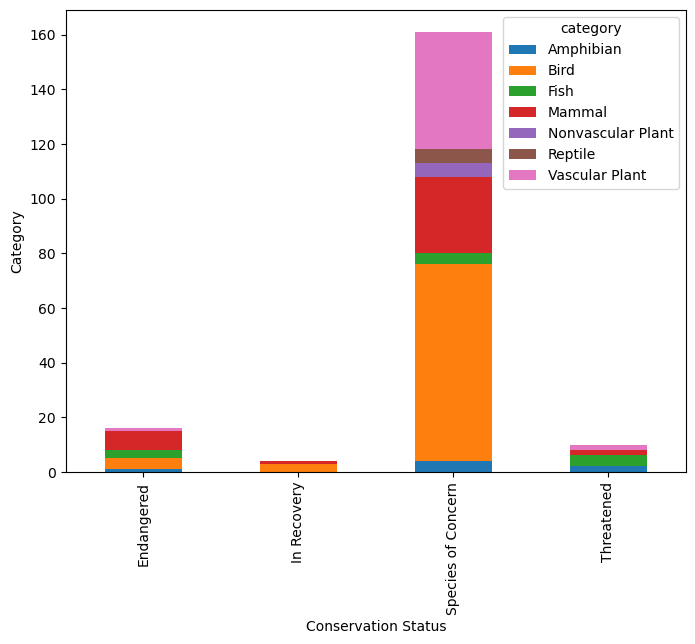

<Figure size 640x480 with 0 Axes>

In [71]:
ax = conservation_category.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Category')
plt.show()
plt.clf()

# Creamos una gráfica mostrando la cantidad de animales en estado de conservación por categoría (tipo de animal).

In [75]:
species['is_protected'] = species.conservation_status != 'No Intervention'

print(species.head())

# Creamos una columna nueva (está protegid@) que almacena la información de todos los tipos de animales en estado 
# de conservación.

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   

   is_protected  
0         False  
1         False  
2         False  
3         False  
4         False  


Once the new column is created, group by `category` and `is_protected` to show the break down of each species type and protection status. 

It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

In [80]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

# 

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Now, let's calculate the percentage of protected species

In [81]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


#### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be called `contingency1` and will need to be filled with the correct numbers for mammals and birds.

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

In [82]:
from scipy.stats import chi2_contingency

In [86]:
contingency1 = [[30, 146],
                [75, 413]]

chi2_mb, pval, dof, expected = chi2_contingency(contingency1)

print(expected) 
print(pval) # Sginificance threshold, that means that in mammals and birds doesn't seems to be any significant 
# relationship between them

[[ 27.8313253 148.1686747]
 [ 77.1686747 410.8313253]]
0.6875948096661336


In [91]:
contigency2 = [[30, 146],
               [5, 73]]
chi2_af, pval, dof, expected = chi2_contingency(contigency2)

print(expected)
print(pval) # 0.03, por lo tanto si hay una relación significativa.

[[ 24.2519685 151.7480315]
 [ 10.7480315  67.2519685]]
0.03835559022969898


The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days.

The first step is to look at the the common names from `species` to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names. 

In [92]:
from itertools import chain 
import string 

def remove_punctuations(text): # Creamos una función para remover las puntuaciones de las palabras.
    for punctuation in string.punctuation: # Hacemos un loop para recorrer cada item de la lista
        text = text.replace(punctuation, '') # Sustituimos la puntuación por un espacio en blanco, que es lo mismo 
        # que eliminarlo.
    return text

common_Names = species[species.category == "Mammal"]\ # Filtramos por la categoría de mamíferos
    .common_names\
    .apply(remove_punctuations)\ # Aplicamos nuestra función previamente creada.
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [94]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

In [95]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

In [96]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

In [99]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)

In [100]:
species[species.is_bat]

In [101]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

In [102]:
bat_observations.groupby('park_name').observations.sum().reset_index()

In [103]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

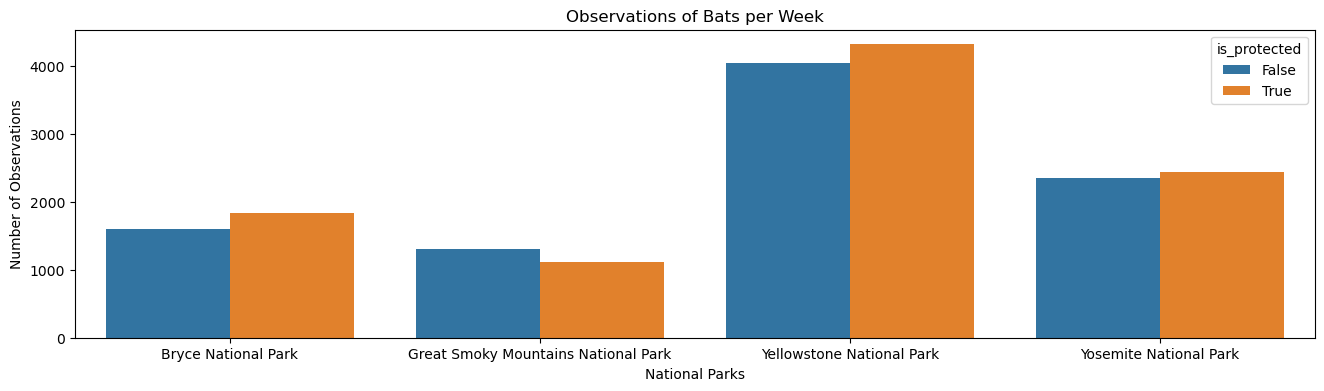

In [105]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()